<strong> Chapter 9 </strong>: Python has several different ways of storing data.  This is described by way of 'types'.  The different types in Python are 
<ol>
<li> <strong> Numeric Types </strong>: Integers, Floats, Complex Numbers </li>
<li> <strong> Sequential Types </strong>: Strings, Lists, Tuples</li>
<li> <strong> Mapping Types </strong>: Dictionaries, Sets </li>
<li> <strong> Boolean Types </strong>: True and False </li>
<li> <strong> User Defined Classes</strong>: A whole other can of worms upon which we will only briefly touch.</li>
</ol>

In [63]:
x = 9
xl = [9, 8, 4, 23]
xt = (9, 8, 4, 23)

y = 3.14159265
yl = [3.14, 2.346, 9.3433]
yt = (3.14, 2.346, 9.3433)

z = "Fred"
zl = ["Fred", "is", "this", "guy"]
zt = ("Fred", "is", "this", "guy")

In [64]:
type(x)

int

In [65]:
type(y)

float

In [66]:
type(z)

str

In [67]:
type(xl)

list

In [68]:
type(xl[0])

int

In [69]:
type(xt)

tuple

In [70]:
type(xt[0])

int

In [71]:
type(yl)

list

In [72]:
type(yl[0])

float

In [73]:
type(zl)

list

In [74]:
type(zl[0])

str

So we see this notion of type is a little funny.  The variable 'zl' for example is of type 'list', but the elements of the list are of type 'str', or string.  To wit, we can even do something like

In [75]:
l_within = [3, 4, 5, ["Fred","is","still","this","guy"]]

In [76]:
type(l_within)

list

In [77]:
type(l_within[0])

int

In [78]:
type(l_within[3])

list

In [79]:
type(l_within[3][0])

str

In [80]:
print l_within[3][0]

Fred


Your turn.  Create a tuple with three elements.  The first element should be an integer, the second a float, and the third a list with two elements, the first a string, the second a float.

In [81]:
your_tup=(1,1.0,["Fred",2.3])

Within reason, we can recast certain types.  For example, 

In [82]:
print int(y)

3


So we have recast a 'float' as an 'int', which has the effect of rounding down to the nearest integer.  And you can do 

In [83]:
print str(y)

3.14159265


which turns the float into a string.  However, if you try 

In [84]:
print int("Fred")

ValueError: invalid literal for int() with base 10: 'Fred'

but that is kind of expected.  

There also issues with doing things like 

In [85]:
res = 9.3234/2

In [86]:
type(res)

float

In [87]:
print res

4.6617


So that behaves more or less as we would like it to.  However, if we do 

In [88]:
res = 3/2

In [89]:
type(res)

int

In [90]:
print res

1


And this makes sense.  If I do an operation on two variables of type int, why wouldn't I get back an int.  Thus, you should be careful sometimes to add that little period i.e. 

In [91]:
res = 3./2.

In [92]:
type(res)

float

In [93]:
print res

1.5


<strong> Chapter 10 </strong>: We won't spend too much time in this chapter.  On this note, we also need to fuss over some choices.  For example, Python has a built in library called 'math'.  But as you will note, I have only thus far called 'numpy'.  Let's see the difference real quick.

In [94]:
from numpy import abs as nabs

In [95]:
from numpy import linspace as lsp

In [96]:
timeit nabs(-3.412342)

The slowest run took 51.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 594 ns per loop


In [97]:
timeit abs(-3.412342)

10000000 loops, best of 3: 55.7 ns per loop


So takes over ten times as long as the standard math library built in to Python.  So why ever use numpy in the first place?  The answer has to do with working over arrays.  To wit 

In [98]:
xvals = lsp(-12,-2,100001)

In [99]:
timeit nabs(xvals)

The slowest run took 8.11 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 50.9 µs per loop


In [100]:
timeit [abs(x) for x in xvals]

10 loops, best of 3: 14.1 ms per loop


So aside from just being easier to write, once we start working over large sets of points, the numpy command runs about 300 times faster than the built in Python version.  

Okay, the next thing to fuss about is 'shallow' vs 'deep' copy in Python, and to be honest, this is the only truly bad thing about the language.  Let me show you what I mean.  

In [101]:
x = [1,2,3,4,5]
y = x
x[3] = 'a'

Okay, what does the list 'y' look like?  Let's see.

In [102]:
print y

[1, 2, 3, 'a', 5]


So, while we never did anything to the variable 'y', when we write something like 'y=x', this does not create a new variable 'y' so much as it creates a new reference to the variable 'x'.  And unfortunately, this issue really does matter and you will come up against it all the time while coding.  To get around it, you need to use 'copy'.

In [103]:
from copy import copy

In [104]:
x = [1,2,3,4,5]
y = copy(x)
x[3] = 'a'

In [105]:
print y

[1, 2, 3, 4, 5]


In [106]:
print x

[1, 2, 3, 'a', 5]


Now what is weird is that this does not always happen.  For example 

In [107]:
x = 9
y = x
x = 7

In [108]:
print y

9


Further, sometimes copy is not enough.  For example

In [109]:
x = [1,[3,4]]
y = copy(x)
x[1][1] = 2

In [110]:
print x

[1, [3, 2]]


In [111]:
print y

[1, [3, 2]]


So the explanation here is that only 'top level' information is copied by 'copy'.  To get the desired effect, we need to use 'deepcopy'.

In [112]:
from copy import deepcopy
x = [1,[3,4]]
y = deepcopy(x)
x[1][1] = 2

In [113]:
print y

[1, [3, 4]]


In [114]:
print x

[1, [3, 2]]


One last quirk is multiple assignment.  For example then, we can write 

In [115]:
a = 1
b = 2
c = 3

or we can just write 

In [116]:
a,b,c = 1,2,3

<strong> Chapter 11 </strong>: Now we are starting to get into real programming.  The first thing we need to talk about is the difference between equality and logical equivalence.  

In [117]:
print 7 == 7

True


In [118]:
print 7 == 6

False


In [119]:
print 7 = 7

SyntaxError: invalid syntax (<ipython-input-119-648bb1bdf514>, line 1)

In [120]:
print "Fred"=="Fred"

True


But testing between floats can get messy

In [121]:
print 7.100==7.1

True


In [122]:
print 7.1000000000000000001 == 7.1

True


And now we introduce 'if' and 'else'.  For example, we can build a step function.

In [123]:
def step_fun(x):
    if x>=0.:
        return 1.
    else:
        return 0.    

In [124]:
step_fun(1.343)

1.0

In [125]:
step_fun(-234.323)

0.0

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
xvals = lsp(-1,1,101)

In [128]:
yvals = [step_fun(x) for x in xvals]

(-0.05, 1.05)

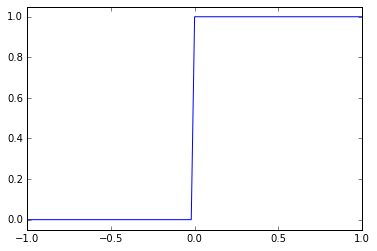

In [129]:
plt.plot(xvals,yvals)
plt.ylim(-.05,1.05)

Now let's try 

In [130]:
def multi_step(x):
    if x<0.:
        return 0.
    elif 0.<=x<1.:
        return 1.
    else:
        return 2.

In [131]:
xvals = lsp(-2,3,301)

In [132]:
yvals = [multi_step(x) for x in xvals]

(-0.05, 2.05)

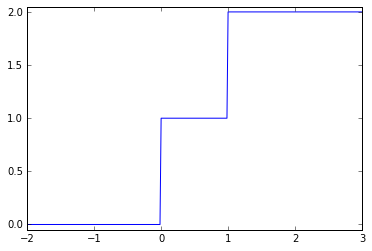

In [133]:
plt.plot(xvals,yvals)
plt.ylim(-.05,2.05)

Now you give it a go.  Implement the function that is $0$ for $x<0$, $1$ for $0\leq x \leq 1$, $2$ for $1\leq x < 2$, and $3$ for $x\geq2$.  

In [134]:
def multi_multi_step(x):
    if x < 0.:
        return 0.
    elif 0.<=x<1:
        return 1.
    elif 1.<=x<2:
        return 2.
    elif 2.<=x:
        return 3.

In [136]:
xvals = lsp(-1,3,1001)

In [137]:
yvals = [multi_multi_step(x) for x in xvals]

(-0.05, 3.05)

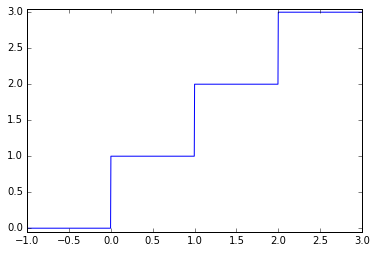

In [138]:
plt.plot(xvals,yvals)
plt.ylim(-.05,3.05)

Let's have a bit more fun now

In [139]:
def comp(x,y):
    if(x >= y):
        print "%f is bigger than %f" % (x,y)
    else:
        print "%f is bigger than %f" % (y,x)

In [140]:
comp(1.323,3.232)

3.232000 is bigger than 1.323000


But this is kind of weak right?  What if x==y?  Don't we want something to happen if that is the case?  Okay, then modify the above function so that you deal with the case x==y.  Make sure you also develop a print statement which reflects this different case.  

Let's also briefly talk about 'not equal'.  So for example we could define a function

In [141]:
def noteq(x,y):
    if(x!=y):
        print "%f is not the same as %f" % (x,y)
    else:
        print "These numbers are the same."

In [142]:
noteq(13.4,4.23)

13.400000 is not the same as 4.230000


In [143]:
noteq(13.4,13.40001)

13.400000 is not the same as 13.400010


In [144]:
noteq(13.4,13.400000000000001)

These numbers are the same.


Okay, now put 'noteq' and 'comp' together.  In other words, use the basic structure in 'noteq' but augment it with the ability of comp so not only can you determine if two numbers are equal or not, but which one is larger than the other.  